In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [19]:
x = pd.read_csv('./data/credit card.csv')
print(x.info())
x.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [20]:
x = x.drop('CUST_ID', axis=1)
x.fillna(method='ffill', inplace=True)#nan 값을 인덱스 상에 앞(ffill), 뒤(bfill) 데이터로 채운다
print(x.info())
x.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [21]:
#평균이 0, 표준편차 1이 되도록 데이터 크기 조정
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_normalized = normalize(x_scaled) #데이터가 가우스 분포 따르도록 정규화
x_normalized = pd.DataFrame(x_normalized) #넘파이 배열을 데이터 프레임으로 변화

pca = PCA(n_components=2) #n_components 몇 차원으로 그래프 만들것인지
x_principal = pca.fit_transform(x_normalized)
x_principal = pd.DataFrame(x_principal)
x_principal.columns =['p1','p2']
x_principal.head()

,p1,p2
0,-0.489949,-0.679976
1,-0.519099,0.544826
2,0.330633,0.268881
3,-0.481657,-0.097612
4,-0.563512,-0.482505


[-1 -1 -1 ... -1 -1 -1]
{0, 1, 2, 3, 4, 5, -1}
{'b', 'g', 'y', 'k'}


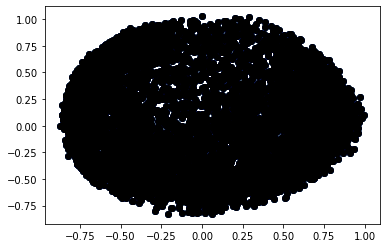

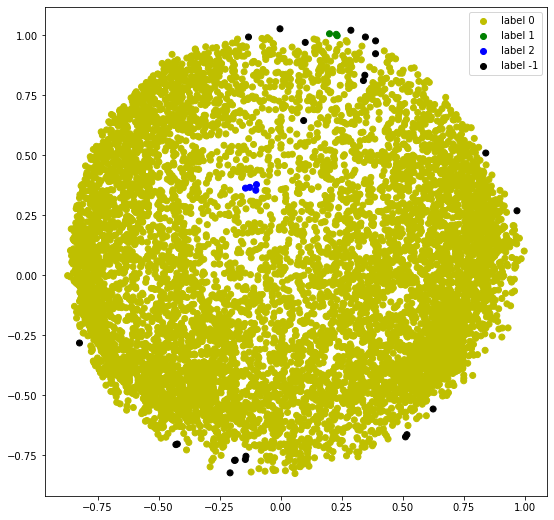

In [37]:
db_default = DBSCAN(eps = 0.0375, min_samples=3).fit(x_principal)
labels = db_default.labels_
print(labels1)
print(set(labels1))

colours = {}
colours[0] = 'y'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

cvec = [colours[label] for label in labels]
print(set(cvec))

r = plt.scatter(x_principal['p1'], x_principal['p2'], color='y')
g = plt.scatter(x_principal['p1'], x_principal['p2'], color='g')
b = plt.scatter(x_principal['p1'], x_principal['p2'], color='b')
k = plt.scatter(x_principal['p1'], x_principal['p2'], color='k')

plt.figure(figsize=(9,9))
plt.scatter(x_principal['p1'], x_principal['p2'], c=cvec)

plt.legend((r, g, b, k), ('label 0', 'label 1', 'label 2', 'label -1'))
plt.show()

[-1 -1 -1 ... -1 -1 -1]
{0, 1, 2, 3, 4, 5, -1}
{'r', 'k', 'y', 'b', 'c', 'g', 'm'}


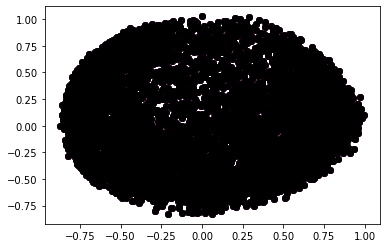

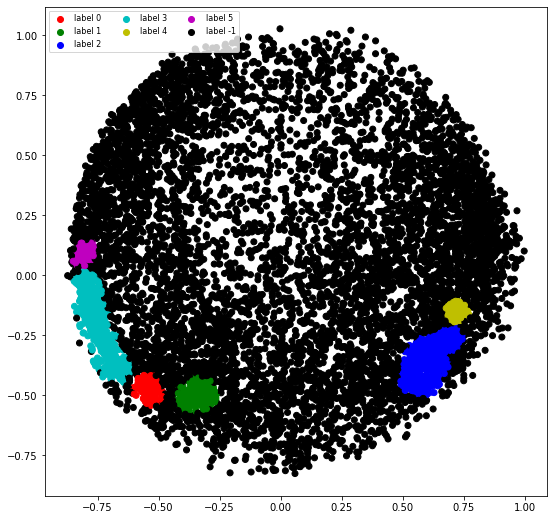

In [36]:
#모델 튜닝
db = DBSCAN(eps=0.0375, min_samples=50).fit(x_principal)
labels1 = db.labels_
print(labels1)
print(set(labels1))

colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'

cvec = [colours1[label] for label in labels1]
print(set(cvec))
colors1 = ['r','g','b','c','y','m','k']

r = plt.scatter(
    x_principal['p1'], x_principal['p2'], marker='o', color = colors1[0])
g = plt.scatter(
    x_principal['p1'], x_principal['p2'], marker='o', color = colors1[1])
b = plt.scatter(
    x_principal['p1'], x_principal['p2'], marker='o', color = colors1[2])
c = plt.scatter(
    x_principal['p1'], x_principal['p2'], marker='o', color = colors1[3])
y = plt.scatter(
    x_principal['p1'], x_principal['p2'], marker='o', color = colors1[4])
m = plt.scatter(
    x_principal['p1'], x_principal['p2'], marker='o', color = colors1[5])
k = plt.scatter(
    x_principal['p1'], x_principal['p2'], marker='o', color = colors1[6])

plt.figure(figsize=(9,9))
plt.scatter(x_principal['p1'], x_principal['p2'], c=cvec)
plt.legend((r,g,b,c,y,m,k),
          ('label 0', 'label 1', 'label 2', 'label 3', 'label 4', 'label 5', 'label -1'),
           scatterpoints=1,
           loc ='upper left',
           ncol=3,
           fontsize=8)
plt.show()

[-1 -1 -1 ... -1 -1 -1]
{0, 1, -1}
{'r', 'g', 'k'}


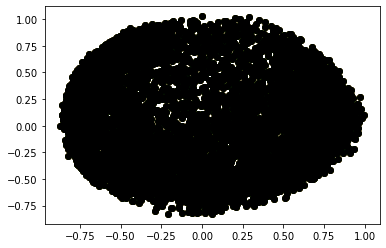

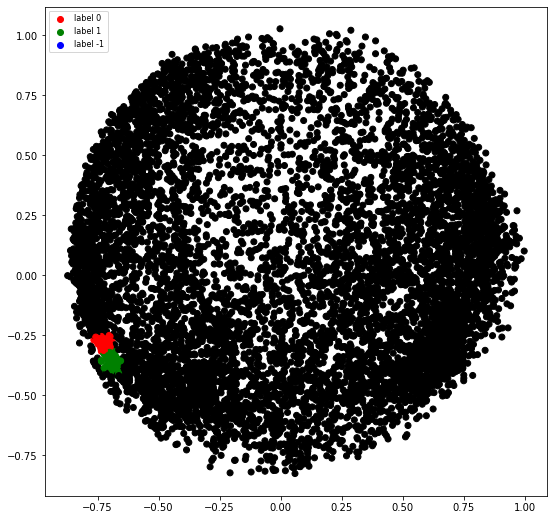

In [39]:
#모델 튜닝
db = DBSCAN(eps=0.0375, min_samples=100).fit(x_principal)
labels1 = db.labels_
print(labels1)
print(set(labels1))

colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[-1] = 'k'

cvec = [colours1[label] for label in labels1]
print(set(cvec))
colors1 = ['r','g','k']

r = plt.scatter(
    x_principal['p1'], x_principal['p2'], marker='o', color = colors1[0])
g = plt.scatter(
    x_principal['p1'], x_principal['p2'], marker='o', color = colors1[1])
k = plt.scatter(
    x_principal['p1'], x_principal['p2'], marker='o', color = colors1[2])

plt.figure(figsize=(9,9))
plt.scatter(x_principal['p1'], x_principal['p2'], c=cvec)
plt.legend((r,g,b,c,y,m,k),
          ('label 0', 'label 1', 'label -1'),
           scatterpoints=1,
           loc ='upper left',
           fontsize=8)
plt.show()